In [1]:
print('Hello worldd!')

Hello worldd!


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

df = pd.read_csv('fortune500.csv')
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


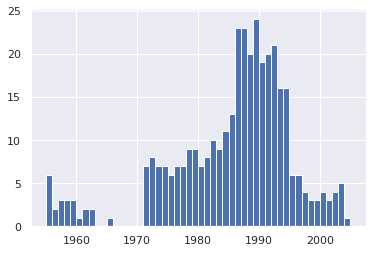

In [3]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']
nnp = df.profit.str.contains('[^0-9.-]')
in_sizes, _, _ = plt.hist(df.year[nnp], bins=range(1955, 2006))

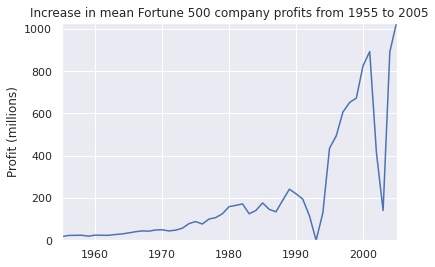

In [4]:
df = df.loc[~nnp]
df.profit = df.profit.apply(pd.to_numeric)
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit

def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)
    
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

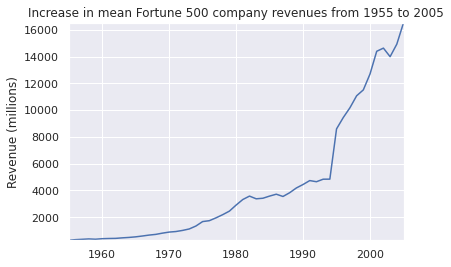

In [5]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

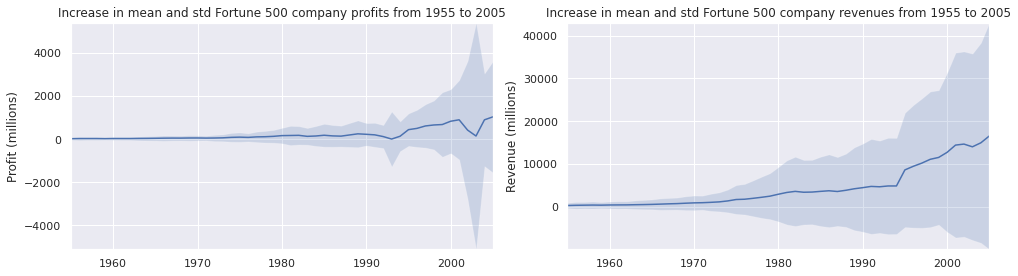

In [6]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()

In [7]:
from mxnet import nd

# Create a matrix
v = nd.array(((1,2,3),(5,6,7)))
v


[[1. 2. 3.]
 [5. 6. 7.]]
<NDArray 2x3 @cpu(0)>

In [8]:
# Create a matrix of ones
x = nd.ones((2,3))
x


[[1. 1. 1.]
 [1. 1. 1.]]
<NDArray 2x3 @cpu(0)>

In [9]:
# Fill array
y = nd.full((2,3), 2.0)
y


[[2. 2. 2.]
 [2. 2. 2.]]
<NDArray 2x3 @cpu(0)>

In [10]:
# Converting to/from numpy arrays.  Note that the instances do not share memory.
z = x.asnumpy()
(type(z), z)

(numpy.ndarray,
 array([[1., 1., 1.],
        [1., 1., 1.]], dtype=float32))

In [11]:
a = nd.array(z)
(type(a), a)

(mxnet.ndarray.ndarray.NDArray,
 
 [[1. 1. 1.]
  [1. 1. 1.]]
 <NDArray 2x3 @cpu(0)>)

In [12]:
# Now, create a neural network
from mxnet.gluon import nn

# Create a dense layer with two output units, and initialize weights (defaults between 0.7 and -0.7)
# Note that initialization is deferred until after the first forward pass.
layer = nn.Dense(2)
layer.initialize()

# Create a 3x4 data array and pass it in
x = nd.random.uniform(-1,1,(3,4))
layer(x)

layer.weight.data()


[[-0.00873779 -0.02834515  0.05484822 -0.06206018]
 [ 0.06491279 -0.03182812 -0.01631819 -0.00312688]]
<NDArray 2x4 @cpu(0)>

In [13]:
# Create a sequential, multi-layered network
net = nn.Sequential()

net.add(

    # First, a convolution layer.  Uses the RelU activation function, six channels, and a 5x5 kernel.
    # Note that a tuple passed to 'kernel' lets the x/y size be defined separately.
    nn.Conv2D(channels=6, kernel_size=5, activation='relu'),
    
    # Next, add a pooling layer, specified by size and stride.  Note that these can also be defined by tuples.
    nn.MaxPool2D(pool_size=2, strides=2),
    
    # Add a couple more
    nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
    nn.MaxPool2D(pool_size=2, strides=(2, 2)),
    
    # Add dense layers on top.  Note that the first one will automatically condense the three dimensions of x,
    # y, and channel from the pooling layer into one dimension.  This reduces the dimensions from d_input to
    # d_input - 2
    nn.Dense(120, activation="relu"),
    nn.Dense(84, activation="relu"),
    nn.Dense(10)
)
net

Sequential(
  (0): Conv2D(None -> 6, kernel_size=(5, 5), stride=(1, 1), Activation(relu))
  (1): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (2): Conv2D(None -> 16, kernel_size=(3, 3), stride=(1, 1), Activation(relu))
  (3): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (4): Dense(None -> 120, Activation(relu))
  (5): Dense(None -> 84, Activation(relu))
  (6): Dense(None -> 10, linear)
)

In [14]:
# Run a forward pass on a 4-D tensor (batch_size, color_channels, height, width)
# Note that the output is 2-D (batch_size, output_size)
net.initialize()
x = nd.random.uniform(shape=(4,1,28,28))
y = net(x)
y.shape

(4, 10)

In [15]:
# Create a block manually
class MixMLP(nn.Block):
    def __init__(self, **kwargs):
        super(MixMLP, self).__init__(**kwargs)
        
        # Contains little more than a short sequence of dense blocks
        self.blk = nn.Sequential()
        self.blk.add(nn.Dense(3, activation='relu'),
                     nn.Dense(4, activation='relu'))
        self.dense = nn.Dense(5)
        
    # This function defines what is passed to the next layer (or out).  Here it takes the output of the sequential
    # dense blocks, applies RelU, then applies the last dense block.  It returns the result.
    def forward(self, x):
        y = nd.relu(self.blk(x))
        print(y)
        return self.dense(y)
    

net = MixMLP()
net

MixMLP(
  (blk): Sequential(
    (0): Dense(None -> 3, Activation(relu))
    (1): Dense(None -> 4, Activation(relu))
  )
  (dense): Dense(None -> 5, linear)
)

In [16]:
# Initialize the net and create a 2x2 random data block
net.initialize()
x = nd.random.uniform(shape=(2,2))

# Apply the net
net(x)

# Observe weight data from the first block
net.blk[1].weight.data()


[[0.0000000e+00 0.0000000e+00 6.2900386e-04 7.6445533e-05]
 [0.0000000e+00 0.0000000e+00 1.1989386e-03 1.2375204e-03]]
<NDArray 2x4 @cpu(0)>



[[-0.0343901  -0.05805862 -0.06187592]
 [-0.06210143 -0.00918167 -0.00170272]
 [-0.02634858  0.05334064  0.02748809]
 [ 0.06669661 -0.01711474  0.01647211]]
<NDArray 4x3 @cpu(0)>

In [17]:
# For calculating gradients, we first create the value array, then inform it that we want to attach gradient data.
x = nd.array([[1, 2], [3, 4]])
x.attach_grad()

# To tell the gradient system that we want to record a function, use autograd
from mxnet import autograd
with autograd.record():
    y = 2 * x * x

# Invoke background propagation
y.backward()

# Show gradient
x.grad

# Note that any expression or function which returns a numeric value could have been used, e.g y = calc_var(x) + x


[[ 4.  8.]
 [12. 16.]]
<NDArray 2x2 @cpu(0)>

In [18]:
# To train the net, first import the relevant libraries.  Start with init, which contains extra functions
# for initializing parameters.
from mxnet import init

# Next import datasets and the functions used to transform them.
from mxnet.gluon.data.vision import datasets, transforms

# Finally, import time for benchmarking
import time

In [19]:
# Download and initialize the MNIST fashion training data
mnist_train = datasets.FashionMNIST(train=True)
X, y = mnist_train[0]
('X shape: ', X.shape, 'X dtype', X.dtype, 'y:', y)

('X shape: ', (28, 28, 1), 'X dtype', numpy.uint8, 'y:', 2)

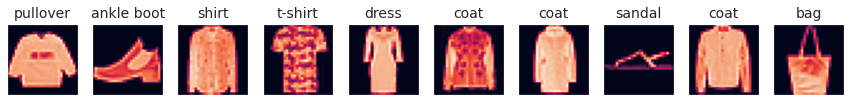

In [20]:
# Visualize the MNIST data
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
X, y = mnist_train[0:10]
_, figs = plt.subplots(1, X.shape[0], figsize=(15, 15))
for f,x,yi in zip(figs, X,y):
    # 3D->2D by removing the last channel dim
    f.imshow(x.reshape((28,28)).asnumpy())
    ax = f.axes
    ax.set_title(text_labels[int(yi)])
    ax.title.set_fontsize(14)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
# Transform the data to a (channels, width, height) tensor and normalize the pixels to have
# mean of 0.13, deviation 0.31.  To start, generate the required transform.
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.13, 0.31)])
mnist_trainer = mnist_train.transform_first(transformer)

# Set up the data loaders used to manipulate datasets, one for training and one for validation.  They take parameters
# such as the above transform, a batch size (here 256), whether or not to shuffle, and the number of worker threads.
from mxnet import gluon
batch_size = 256
train_data = gluon.data.DataLoader(
    mnist_trainer, batch_size=batch_size, shuffle=True, num_workers=4)

# Show training data sizes
for data, label in train_data:
    print(data.shape, label.shape)
    break
mnist_valid = gluon.data.vision.FashionMNIST(train=False)
valid_data = gluon.data.DataLoader(
    mnist_valid.transform_first(transformer),
    batch_size=batch_size, num_workers=4)

(256, 1, 28, 28) (256,)


In [24]:
# Reimplement LeNet from above, using Xavier init function
net = nn.Sequential()
net.add(nn.Conv2D(channels=6, kernel_size=5, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Flatten(),
        nn.Dense(120, activation="relu"),
        nn.Dense(84, activation="relu"),
        nn.Dense(10))
net.initialize(init=init.Xavier())

# Define loss function
softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()

# Generate a SGD trainer with a learning rate of 0.1
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

# Define function for calculating model accuracy
def acc(output, label):
    # output: (batch, num_output) float32 ndarray
    # label: (batch, ) int32 ndarray
    return (output.argmax(axis=1) ==
            label.astype('float32')).mean().asscalar()

# Finally, train
for epoch in range(10):
    train_loss, train_acc, valid_acc = 0., 0., 0.
    tic = time.time()
    for data, label in train_data:
        # forward + backward
        with autograd.record():
            output = net(data)
            loss = softmax_cross_entropy(output, label)
        loss.backward()
        # update parameters
        trainer.step(batch_size)
        # calculate training metrics
        train_loss += loss.mean().asscalar()
        train_acc += acc(output, label)
    # calculate validation accuracy
    for data, label in valid_data:
        valid_acc += acc(net(data), label)
    print("Epoch %d: loss %.3f, train acc %.3f, test acc %.3f, in %.1f sec" % (
            epoch, train_loss/len(train_data), train_acc/len(train_data),
            valid_acc/len(valid_data), time.time()-tic))

Epoch 0: loss 0.746, train acc 0.725, test acc 0.834, in 11.7 sec
Epoch 1: loss 0.458, train acc 0.829, test acc 0.853, in 12.0 sec
Epoch 2: loss 0.401, train acc 0.851, test acc 0.862, in 12.2 sec
Epoch 3: loss 0.365, train acc 0.866, test acc 0.869, in 12.3 sec
Epoch 4: loss 0.340, train acc 0.874, test acc 0.876, in 12.1 sec
Epoch 5: loss 0.325, train acc 0.880, test acc 0.873, in 12.1 sec
Epoch 6: loss 0.310, train acc 0.886, test acc 0.874, in 11.5 sec
Epoch 7: loss 0.295, train acc 0.890, test acc 0.893, in 11.3 sec
Epoch 8: loss 0.286, train acc 0.894, test acc 0.887, in 11.9 sec
Epoch 9: loss 0.275, train acc 0.897, test acc 0.891, in 11.5 sec


In [25]:
#Save parameters
net.save_parameters('net.params')

In [26]:
# Now create a new net and reload them.  This is not necessary, rather it serves to demonstrate how to use saved
# parameters to initialize a module.
net = nn.Sequential()
net.add(nn.Conv2D(channels=6, kernel_size=5, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Flatten(),
        nn.Dense(120, activation="relu"),
        nn.Dense(84, activation="relu"),
        nn.Dense(10))
net.load_parameters('net.params')

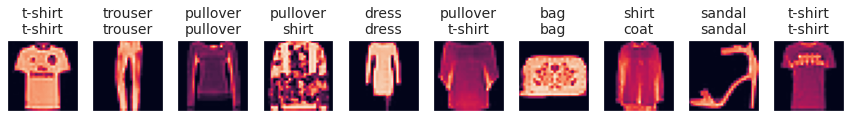

In [27]:
# Now we test our validation data, taking the maximum output as our classification
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.13, 0.31)])

mnist_valid = datasets.FashionMNIST(train=False)
X, y = mnist_valid[:10]
preds = []
for x in X:
    x = transformer(x).expand_dims(axis=0)
    pred = net(x).argmax(axis=1)
    preds.append(pred.astype('int32').asscalar())
    

# Plot the data
_, figs = plt.subplots(1, 10, figsize=(15, 15))
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
for f,x,yi,pyi in zip(figs, X, y, preds):
    f.imshow(x.reshape((28,28)).asnumpy())
    ax = f.axes
    ax.set_title(text_labels[yi]+'\n'+text_labels[pyi])
    ax.title.set_fontsize(14)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [28]:
# MXNet also comes with pretrained models.  Download and instantiate a ResNet-50 v2 model trained on the
# ImageNet dataset.
from mxnet.gluon.model_zoo import vision as models
from mxnet.gluon.utils import download
from mxnet import image

net = models.resnet50_v2(pretrained=True)

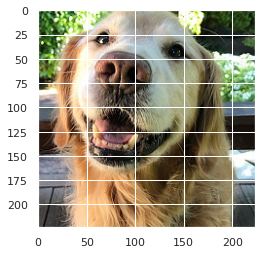

In [29]:
# Download and load text labels for each class
url = 'http://data.mxnet.io/models/imagenet/synset.txt'
fname = download(url)
with open(fname, 'r') as f:
    text_labels = [' '.join(l.split()[1:]) for l in f]

# Pick a dog from Wikipedia for the test image and load it
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/\
Golden_Retriever_medium-to-light-coat.jpg/\
365px-Golden_Retriever_medium-to-light-coat.jpg'
fname = download(url)
x = image.imread(fname)

# Resize and crop to get a 224x224 pixel image.
x = image.resize_short(x, 256)
x, _ = image.center_crop(x, (224,224))
plt.imshow(x.asnumpy())
plt.show()

In [30]:
# Transform the data into an acceptable tensor formate.  This involves transposing axes and normalizing RGB.
def transform(data):
    data = data.transpose((2,0,1)).expand_dims(axis=0)
    rgb_mean = nd.array([0.485, 0.456, 0.406]).reshape((1,3,1,1))
    rgb_std = nd.array([0.229, 0.224, 0.225]).reshape((1,3,1,1))
    return (data.astype('float32') / 255 - rgb_mean) / rgb_std

#  Run the net, and print the top five recognized objects
prob = net(transform(x)).softmax()
idx = prob.topk(k=5)[0]
for i in idx:
    i = int(i.asscalar())
    print('With prob = %.5f, it contains %s' % (
        prob[0,i].asscalar(), text_labels[i]))

With prob = 0.98225, it contains golden retriever
With prob = 0.00816, it contains English setter
With prob = 0.00264, it contains Irish setter, red setter
With prob = 0.00221, it contains cocker spaniel, English cocker spaniel, cocker
With prob = 0.00181, it contains Labrador retriever


In [31]:
# To request data from a website, use python requests
import requests
r = requests.get("http://help.websiteos.com/websiteos/example_of_a_simple_html_page.htm")
print(r.text)

<!doctype HTML public "-//W3C//DTD HTML 4.0 Frameset//EN">

<!-- saved from url=(0014)about:internet -->
<html>

<head>
<meta http-equiv="content-type" content="text/html;charset=windows-1252">
<title>Example of a simple HTML page</title>
<meta name="generator" content="Adobe RoboHelp - www.adobe.com">
<link rel="stylesheet" href="default_ns.css"><script type="text/javascript" language="JavaScript" title="WebHelpSplitCss">
<!--
if (navigator.appName !="Netscape")
{   document.write("<link rel='stylesheet' href='default.css'>");}
//-->
</script>
<style type="text/css">
<!--
img_whs1 { border:none; width:301px; height:295px; float:none; }
p.whs2 { margin-bottom:5pt; }
p.whs3 { margin-bottom:9.5pt; }
-->
</style><script type="text/javascript" language="JavaScript" title="WebHelpInlineScript">
<!--
function reDo() {
  if (innerWidth != origWidth || innerHeight != origHeight)
     location.reload();
}
if ((parseInt(navigator.appVersion) == 4) && (navigator.appName == "Netscape")) {
	origWid

In [32]:
# Request data from the alpha_vantage api in CSV format
r = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=demo&datatype=csv")
print(r.text)

timestamp,open,high,low,close,volume
2020-11-20 18:40:00,116.8000,116.8000,116.8000,116.8000,117
2020-11-20 16:20:00,116.9400,116.9400,116.9400,116.9400,200
2020-11-20 16:15:00,116.9517,116.9517,116.8500,116.8500,326
2020-11-20 16:05:00,116.9400,116.9400,116.9400,116.9400,367417
2020-11-20 16:00:00,116.9000,116.9400,116.7500,116.9300,304178
2020-11-20 15:55:00,117.2900,117.3250,116.8700,116.8800,193915
2020-11-20 15:50:00,117.1700,117.4200,117.1700,117.3250,85948
2020-11-20 15:45:00,117.1300,117.1900,117.0700,117.1800,65178
2020-11-20 15:40:00,117.0300,117.1950,117.0000,117.1250,71524
2020-11-20 15:35:00,117.0250,117.1050,116.9700,117.0400,56517
2020-11-20 15:30:00,117.0400,117.1300,117.0033,117.0400,50715
2020-11-20 15:25:00,116.9745,117.1864,116.9300,117.0500,57656
2020-11-20 15:20:00,117.0379,117.0379,116.8865,116.9700,56767
2020-11-20 15:15:00,117.0800,117.1700,116.9700,117.0400,48082
2020-11-20 15:10:00,117.2400,117.3100,117.0600,117.0994,46409
2020-11-20 15:05:00,117.3100,117.355

<bound method Figure.tight_layout of <Figure size 1440x1440 with 6 Axes>>

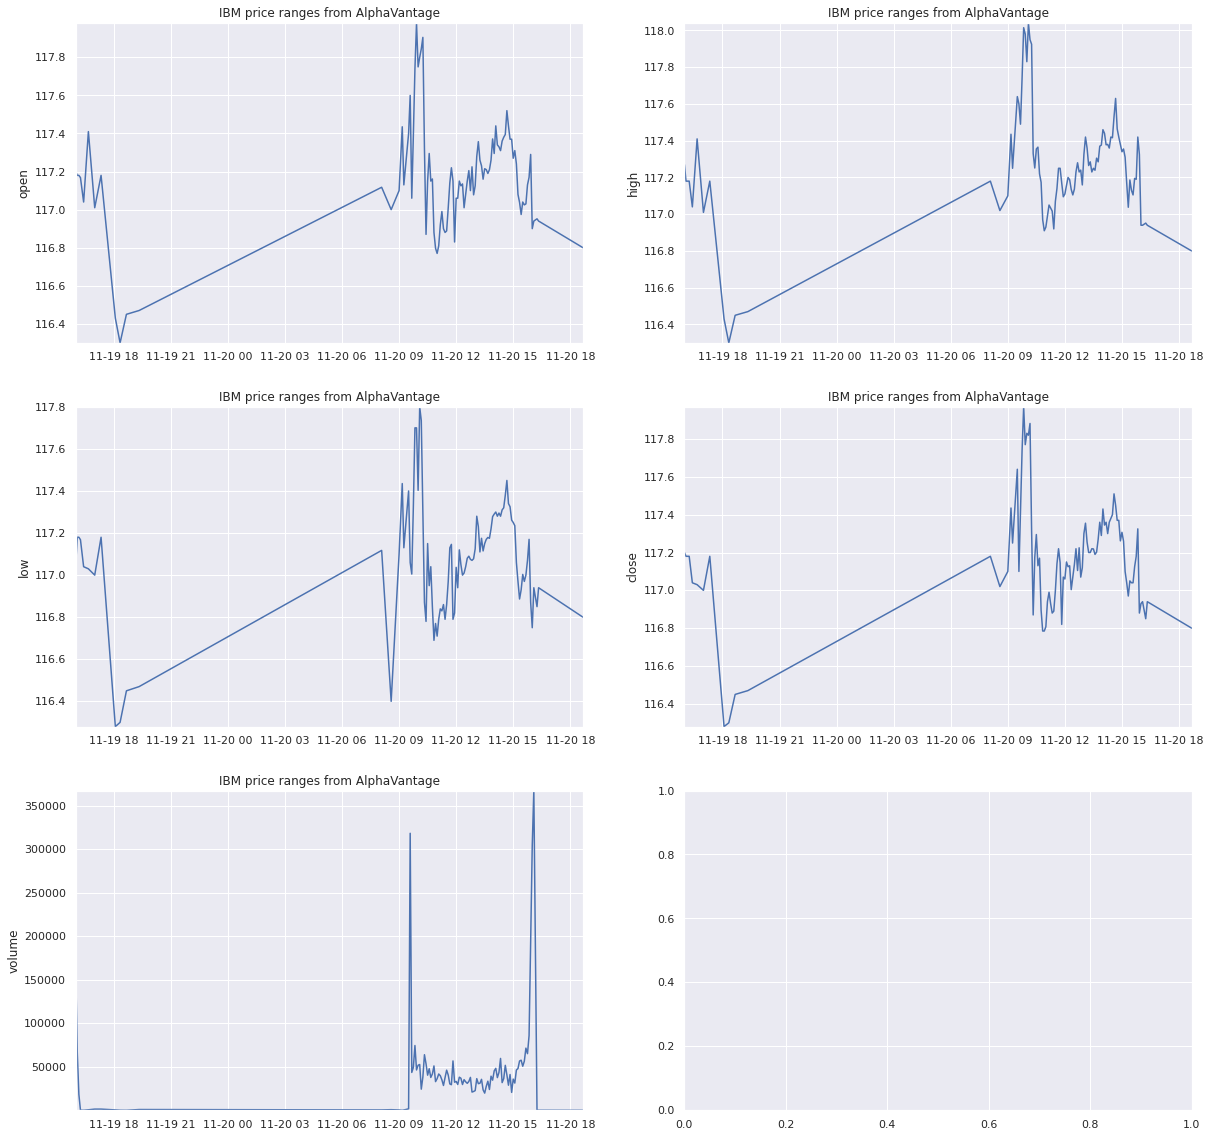

In [47]:
# Convert this data into a pandas datasheet and plot it.  Note pandas was imported long ago.
from io import StringIO

# Ensure plotting utility functions are defined
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

# Generate dataframe
data_frame = pd.read_csv(StringIO(r.text), parse_dates=[0], infer_datetime_format=True)

# Generate x-axis from timestamps
x = data_frame.timestamp
    
# Plot each data column
title = 'IBM price ranges from AlphaVantage'
fig, axes = plt.subplots(nrows=3, ncols=2)
for index, column in enumerate(["open", "high", "low", "close", "volume"]):
    plot(x, data_frame[column], axes[index//2][index %2], title, column)
fig.set_size_inches(20, 20)
fig.tight_layout